# Лабораторная работа №2. Милевич Артём ИУ5-23М
### Цель работы
Изучение продвинутых способов предварительной обработки данных для дальнейшего формирования моделей.
### Задание
1) Выбрать набор данных (датасет), содержащий категориальные и числовые признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.) Просьба не использовать датасет, на котором данная задача решалась в лекции.
2) Для выбранного датасета (датасетов) на основе материалов лекций решить следующие задачи:
устранение пропусков в данных,
кодирование категориальных признаков,
нормализация числовых признаков.

## Ход работы

In [45]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Загрузка данных
df = pd.read_csv('Online Sales Data.csv')

# Проверка структуры
print(df.info())
print("\nПропуски:\n", df.isnull().sum())
print("\nКатегориальные признаки:\n", df.select_dtypes(include='object').nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    245 non-null    object 
 1   Date              244 non-null    object 
 2   Product Category  239 non-null    object 
 3   Product Name      244 non-null    object 
 4   Units Sold        239 non-null    float64
 5   Unit Price        239 non-null    float64
 6   Total Revenue     239 non-null    float64
 7   Region            239 non-null    object 
 8   Payment Method    239 non-null    object 
dtypes: float64(3), object(6)
memory usage: 17.4+ KB
None

Пропуски:
 Transaction ID      0
Date                1
Product Category    6
Product Name        1
Units Sold          6
Unit Price          6
Total Revenue       6
Region              6
Payment Method      6
dtype: int64

Категориальные признаки:
 Transaction ID      245
Date                239
Product Category      6

Удаление 

In [46]:
# Числовые признаки (заполняем медианой)
num_cols = ['Units Sold', 'Unit Price', 'Total Revenue']
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Категориальные признаки (заполняем модой)
cat_cols = ['Product Category', 'Payment Method', 'Region', 'Product Name', 'Date']
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Проверка результата
print("\nПропуски после обработки:\n", df.isnull().sum())


Пропуски после обработки:
 Transaction ID      0
Date                0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
dtype: int64


Label Encoding для порядковых признаков:

In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Payment Method'] = le.fit_transform(df['Payment Method'])
df['Product Category'] = le.fit_transform(df['Product Category'])
df['Region'] = le.fit_transform(df['Region'])

Robust Scaling для Total Revenue

In [48]:
from sklearn.preprocessing import RobustScaler

# Инициализация scaler
scaler = RobustScaler()

# Нормализация только Total Price
df['Total Revenue Scaled'] = scaler.fit_transform(df[['Total Revenue']])

# Проверка результата
print(df[['Total Revenue', 'Total Revenue Scaled']].describe())

       Total Revenue  Total Revenue Scaled
count     245.000000            245.000000
mean      332.815102              0.458925
std       481.191488              1.444803
min         6.500000             -0.520853
25%        64.950000             -0.345354
50%       179.970000              0.000000
75%       398.000000              0.654646
max      3899.990000             11.169554


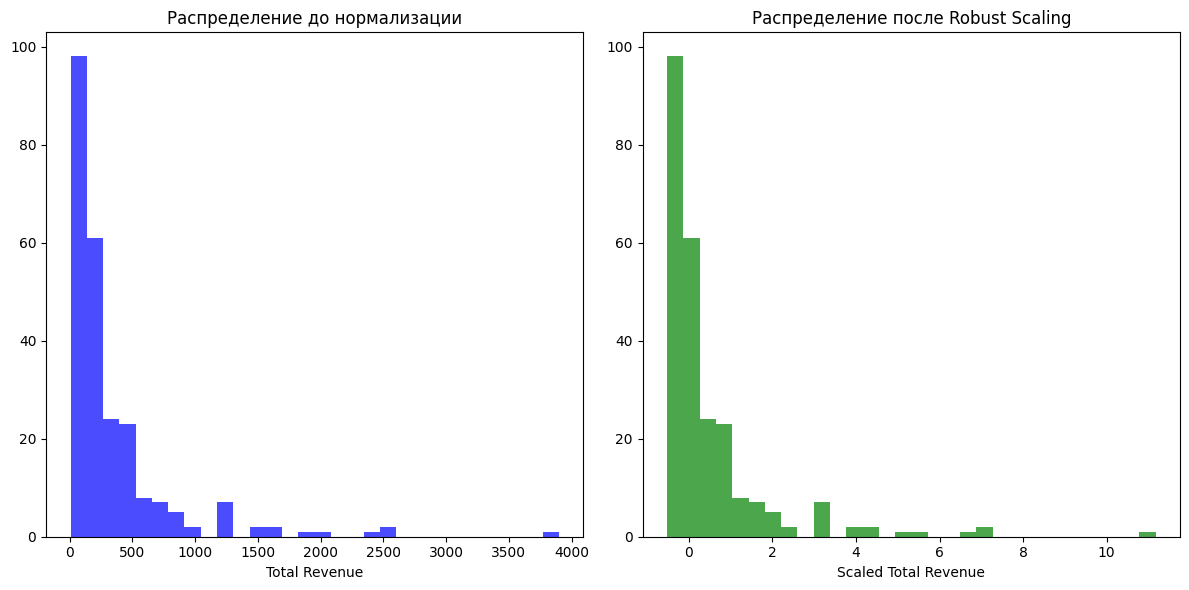

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# До обработки
plt.subplot(1, 2, 1)
plt.hist(df['Total Revenue'], bins=30, color='blue', alpha=0.7)
plt.title('Распределение до нормализации')
plt.xlabel('Total Revenue')

# После обработки
plt.subplot(1, 2, 2)
plt.hist(df['Total Revenue Scaled'], bins=30, color='green', alpha=0.7)
plt.title('Распределение после Robust Scaling')
plt.xlabel('Scaled Total Revenue')

plt.tight_layout()
plt.show()

In [50]:
print(df.head())
print(df.info())

  Transaction ID        Date  Product Category             Product Name  \
0          10001  2024-01-01                 3            iPhone 14 Pro   
1          10002  2024-01-02                 4         Dyson V11 Vacuum   
2          10003  2024-01-03                 2         Levi's 501 Jeans   
3          10004  2024-01-04                 1        The Da Vinci Code   
4          10005  2024-01-05                 0  Neutrogena Skincare Set   

   Units Sold  Unit Price  Total Revenue  Region  Payment Method  \
0         2.0      999.99        1999.98       2               0   
1         1.0      499.99         499.99       1               2   
2         3.0       69.99         209.97       0               1   
3         4.0       15.99          63.96       2               0   
4         1.0       89.99          89.99       1               2   

   Total Revenue Scaled  
0              5.464675  
1              0.960877  
2              0.090077  
3             -0.348326  
4         

## Вывод
В ходе работы данные были успешно подготовлены для анализа: пропуски заполнены медианой и модой, категориальные признаки закодированы через Label Encoding, а выручка нормализована с помощью устойчивого к выбросам Robust Scaling. Полученный датасет теперь корректно отражает структуру продаж без искажающего влияния аномалий и пропущенных значений.